# Linear Regression in plain Python

In linear regression we want to model the relationship between a **scalar dependent variable** $y$ and one or more **independent (predictor) variables** $\pmb{x}$.

**Given:** 
- dataset $\{(\pmb{x}^{(1)}, y^{(1)}), ..., (\pmb{x}^{(m)}, y^{(m)})\}$
- with $\pmb{x}^{(i)}$ being a $d-$dimensional vector $\pmb{x}^i = (x^{(i)}_1, ..., x^{(i)}_d)$
- $y^{(i)}$ being a scalar target variable

The linear regression model can be interpreted as a very **simple neural network:**
- it has a real-valued weight vector $\pmb{w}= (w^{(1)}, ..., w^{(d)})$
- it has a real-valued bias $b$
- it uses the identity function as its activation function

A linear regression model can be trained using either  
a) gradient descent or  
b) the normal equation (closed-form solution): $\pmb{w} = (\pmb{X}^T \pmb{X})^{-1} \pmb{X}^T \pmb{y}$ 

where $\pmb{X}$ is a matrix of shape $(m, n_{features})$ that holds all training examples.  
The normal equation requires computing the inverse of $\pmb{X}^T \pmb{X}$. The computational complexity of this operation lies between $O(n_{features}^{2.4}$) and $O(n_{features}^3$) (depending on the implementation).
Therefore, if the number of features in the training set is large, the normal equation will get very slow. 

* * *
Training a linear regression model has different steps.

**Step 0: ** 

Initialize the weight vector and bias with zeros (or small random values)

**OR**

Compute the parameters directly using the normal equation
* * *

**Step 1: ** (Only needed when training with gradient descent)

Compute a linear combination of the input features and weights. This can be done in one step for all training examples, using vectorization and broadcasting:
$\pmb{\hat{y}} = \pmb{X} \cdot \pmb{w} + b $

where $\pmb{X}$ is a matrix of shape $(m, n_{features})$ that holds all training examples, and $\cdot$ denotes the dot product.
* * *

**Step 2: ** (Only needed when training with gradient descent)

Compute the cost (mean squared error) over the training set:

$J(\pmb{w},b) = \frac{1}{m} \sum_{i=1}^m \Big(\hat{y}^{(i)} - y^{(i)} \Big)^2$
* * *

**Step 3: **  (Only needed when training with gradient descent)

Compute the partial derivatives of the cost function with respect to each parameter:

$ \frac{\partial J}{\partial w_j} = \frac{2}{m}\sum_{i=1}^m \Big( \hat{y}^{(i)} - y^{(i)} \Big) x^{(i)}_j$

To simplify the computation of the gradient we can include the bias in the weight vector $\pmb{w}= (b, w^{(1)}, ..., w^{(d)})$ and add an additional input of +1 to each input vector $\pmb{x}^i = (1, x^{(i)}_1, ..., x^{(i)}_d)$.

The gradient containing all partial derivatives can then be computed as follows: 

$\nabla_{\pmb{w}} J = \frac{2}{m} \pmb{X}^T \cdot \big(\pmb{\hat{y}} - \pmb{y} \big)$
* * *

**Step 4: ** (Only needed when training with gradient descent)

Update the weight vector (which includes the bias):

$\pmb{w} = \pmb{w} - \eta \, \nabla_w J$  

where $\eta$ is the learning rate.


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

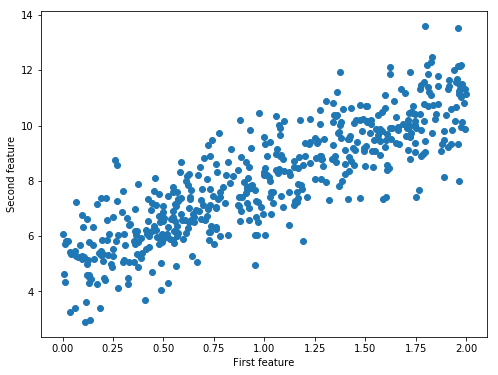

In [48]:
# We will use a simple training set

X = 2 * np.random.rand(500, 1)
y = 5 + 3 * X + np.random.randn(500, 1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [49]:
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

print('Shape X_train: ', X_train.shape)
print('Shape y_train: ', y_train.shape)
print('Shape X_test: ', X_test.shape)
print('Shape y_test: ', y_test.shape)

Shape X_train:  (375, 1)
Shape y_train:  (375, 1)
Shape X_test:  (125, 1)
Shape y_test:  (125, 1)


In [50]:
n_samples, n_features = X_train.shape
n_samples_test, _ = X_test.shape

# Step 0: Initialize the parameters
# We will include the bias in the weight vector, as described above
w = np.zeros(shape=(n_features+1,1))

# add x0 = 1 to each input example
X_b_train = np.c_[np.ones((n_samples, 1)), X_train]
X_b_test = np.c_[np.ones((n_samples_test, 1)), X_test]

In [62]:
def train_gradient_descent(X, y, w, learning_rate=0.01, n_iters=100):
    """
    Trains a linear regression model using gradient descent
    """
    n_samples, n_features = X.shape
    costs = []
    
    for i in range(n_iters):
        # Step 1: Compute a linear combination of the input features and weights
        y_predict = np.dot(X, w)

        # Step 2: Compute cost over training set
        cost = 1/n_samples * np.sum((y_predict - y)**2)
        costs.append(cost)

        if i % 100 == 0:
            print("Cost at iteration {}: {}".format(i, cost))
            
        # Step 3: Compute the gradient
        gradient = 2/n_samples * np.dot(X.T, (y_predict - y))
        
        # Step 4: Update the parameters
        w = w - learning_rate * gradient
           
    return w, costs

def train_normal_equation(X, y):
    """
    Trains a linear regression model using the normal equation
    """
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    return w

def predict(X, w):
    return np.dot(X, w)

Cost at iteration 0: 67.62334254134042
Cost at iteration 100: 2.32271036304225
Cost at iteration 200: 1.3879168824994075
Cost at iteration 300: 1.3062193192071265
Cost at iteration 400: 1.2542096527360296
Cost at iteration 500: 1.2162725435256665
Cost at iteration 600: 1.1885290058060676
Cost at iteration 700: 1.1682391428322834
Cost at iteration 800: 1.1534004127669986
Cost at iteration 900: 1.1425482984221769

Error on training set: 1.1346117441979315
Error on test set: 1.129300028335827


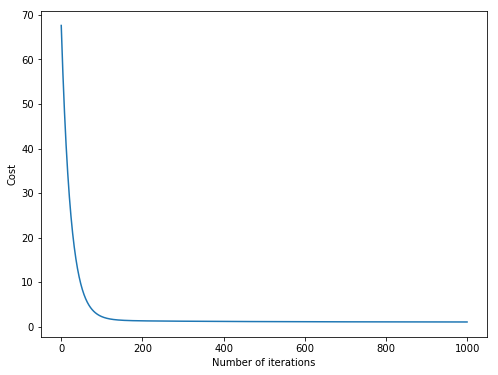

In [63]:
n_iters = 1000
learning_rate = 0.005
w_trained, costs = train_gradient_descent(X_b_train, y_train, w, learning_rate, n_iters)

y_p_train = predict(X_b_train, w_trained)
y_p_test = predict(X_b_test, w_trained)

error_train =  1/n_samples * np.sum((y_p_train - y_train)**2)
error_test =  1/n_samples_test * np.sum((y_p_test - y_test)**2)
print()
print("Error on training set: {}".format(error_train))
print("Error on test set: {}".format(error_test))

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(n_iters), costs)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [64]:
w_trained = train_normal_equation(X_b_train, y_train)

y_p_train = predict(X_b_train, w_trained)
y_p_test = predict(X_b_test, w_trained)

error_train =  1/n_samples * np.sum((y_p_train - y_train)**2)
error_test =  1/n_samples_test * np.sum((y_p_test - y_test)**2)
print()
print("Error on training set: {}".format(error_train))
print("Error on test set: {}".format(error_test))


Error on training set: 1.1130073558984594
Error on test set: 1.1005339929898699


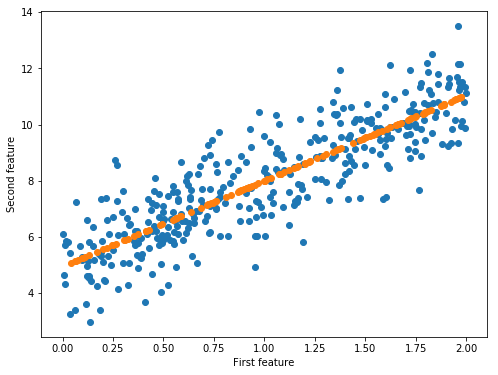

In [67]:
# Plot the test predictions

fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_p_test)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()